In [2]:
conda env create -f environment.yml


Note: you may need to restart the kernel to use updated packages.



CondaValueError: prefix already exists: C:\Users\liamw\anaconda3\envs\liam_science_fair



In [3]:
conda install numpy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [4]:
!python -m pip install geopandas numpy

In [5]:
!python3 -m pip install geopandas pandas

'python3' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import geopandas as gpd
import pandas as pd

In [7]:
leases = gpd.read_file("raw_data/ASLD_-_State_Trust_Parcels/ASLD_-_State_Trust_Parcels.shp")
leases.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    23116 non-null  int64   
 1   landnum     23116 non-null  object  
 2   County      23116 non-null  object  
 3   parcel      23116 non-null  int64   
 4   fundtxt     23116 non-null  object  
 5   open_code   23116 non-null  int64   
 6   leased      23116 non-null  object  
 7   ke          23116 non-null  object  
 8   lease_      23116 non-null  int64   
 9   lse_code    23116 non-null  int64   
 10  lse_seq     23116 non-null  int64   
 11  effdate     19929 non-null  object  
 12  expdate     19929 non-null  object  
 13  perpetual   0 non-null      object  
 14  aus         23116 non-null  float64 
 15  rolodex_    23116 non-null  int64   
 16  full_name   19929 non-null  object  
 17  trs         23116 non-null  object  
 18  legal       23103 non-null  object  
 

In [8]:
leases.geometry[1].contains(leases.geometry[0])

False

In [9]:
leases.iloc[0]

OBJECTID                                                  46243
landnum                                 1   10   28 3  1  31005
County                                                   Apache
parcel                                                     1005
fundtxt                          AGRICULTURE & MECHANICAL CLLGE
open_code                                                     0
leased                                                        Y
ke                                                            5
lease_                                                   104398
lse_code                                                      0
lse_seq                                                       0
effdate                                                20180930
expdate                                                20280929
perpetual                                                  None
aus                                                         0.5
rolodex_                                

In [10]:
# Note columns 'SITE_ALTIT_ACCURACY' and SITE_USE_3 have mixed types. If we want to use them we will 
# need to figure out why
wells = pd.read_csv("raw_data/cleaned_well_data.csv")
wells.info()

C:\Users\liamw\AppData\Local\Temp\ipykernel_20304\4048727155.py:3: DtypeWarning: Columns (36,45) have mixed types. Specify dtype option on import or set low_memory=False.
  wells = pd.read_csv("raw_data/cleaned_well_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289301 entries, 0 to 289300
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  289301 non-null  int64  
 1   wellid                      289301 non-null  int64  
 2   WLWA_ID                     289301 non-null  int64  
 3   date                        288969 non-null  object 
 4   depth                       275285 non-null  float64
 5   WLWA_WATER_LEVEL_ELEVATION  275285 non-null  float64
 6   WLWA_SOURCE_CODE            283252 non-null  object 
 7   WLWA_METHOD_CODE            272560 non-null  object 
 8   WLWA_REMARK_CODE            24846 non-null   object 
 9   SITE_WELL_ALTITUDE          289301 non-null  float64
 10  SITE_LOCAL_ID               289301 non-null  object 
 11  SITE_LATIT_DEGREE           289301 non-null  int64  
 12  SITE_LATIT_MIN              289301 non-null  int64  
 13  SITE_LATIT_SEC

<Axes: >

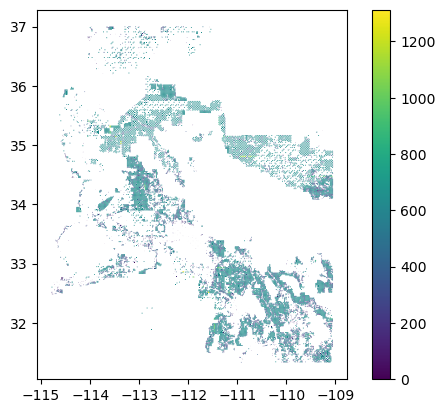

In [11]:
leases.plot("acres", legend = True)

In [12]:
leases.to_csv("our_data/raw_lease_data.csv")

In [13]:
wells['geometry'] = gpd.points_from_xy(
    x=wells.SITE_LONGIT_DECIMAL, 
    y=wells.SITE_LATITUDE_DECIMAL, 
    crs="EPSG:4326"
    )
wells = gpd.GeoDataFrame(data=wells, geometry='geometry')

<Axes: >

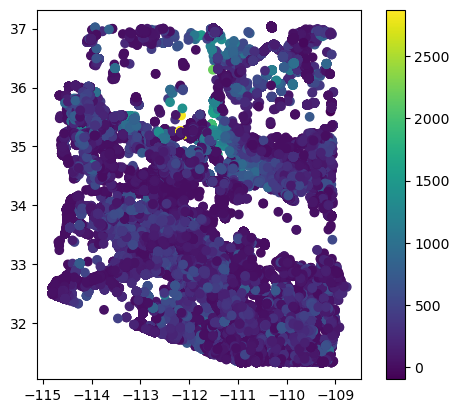

In [14]:
wells.plot("depth", legend=True)

In [15]:
wells = gpd.GeoDataFrame(data=wells, geometry='geometry')

In [16]:
wells.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 289301 entries, 0 to 289300
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Unnamed: 0                  289301 non-null  int64   
 1   wellid                      289301 non-null  int64   
 2   WLWA_ID                     289301 non-null  int64   
 3   date                        288969 non-null  object  
 4   depth                       275285 non-null  float64 
 5   WLWA_WATER_LEVEL_ELEVATION  275285 non-null  float64 
 6   WLWA_SOURCE_CODE            283252 non-null  object  
 7   WLWA_METHOD_CODE            272560 non-null  object  
 8   WLWA_REMARK_CODE            24846 non-null   object  
 9   SITE_WELL_ALTITUDE          289301 non-null  float64 
 10  SITE_LOCAL_ID               289301 non-null  object  
 11  SITE_LATIT_DEGREE           289301 non-null  int64   
 12  SITE_LATIT_MIN              289301 non-null  int64

In [17]:
leases.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    23116 non-null  int64   
 1   landnum     23116 non-null  object  
 2   County      23116 non-null  object  
 3   parcel      23116 non-null  int64   
 4   fundtxt     23116 non-null  object  
 5   open_code   23116 non-null  int64   
 6   leased      23116 non-null  object  
 7   ke          23116 non-null  object  
 8   lease_      23116 non-null  int64   
 9   lse_code    23116 non-null  int64   
 10  lse_seq     23116 non-null  int64   
 11  effdate     19929 non-null  object  
 12  expdate     19929 non-null  object  
 13  perpetual   0 non-null      object  
 14  aus         23116 non-null  float64 
 15  rolodex_    23116 non-null  int64   
 16  full_name   19929 non-null  object  
 17  trs         23116 non-null  object  
 18  legal       23103 non-null  object  
 

In [18]:
leases, wells.merge

(       OBJECTID                  landnum     County  parcel  \
 0         46243  1   10   28 3  1  31005     Apache    1005   
 1         46244  1   10   28 3  1  31004     Apache    1004   
 2         46245  1   10   2812  1  31002     Apache    1002   
 3         46246  1   10   2810  1  31005     Apache    1005   
 4         46247  1   10   28 4  1  31002     Apache    1002   
 ...         ...                      ...        ...     ...   
 23111     69354  2    2   2325 17 311002  Riverside    1002   
 23112     69355  2    2   22 4 17 311002  Riverside    1002   
 23113     69356  2    2   2219 17 311002  Riverside    1002   
 23114     69357  2    2   2324 17 311002  Riverside    1002   
 23115     69358  2    2   2218 17 311002  Riverside    1002   
 
                               fundtxt  open_code leased ke  lease_  lse_code  \
 0      AGRICULTURE & MECHANICAL CLLGE          0      Y  5  104398         0   
 1      AGRICULTURE & MECHANICAL CLLGE          0      Y  5  104398 

In [19]:
import geopandas as gpd
lease_column = leases['leased']
print(lease_column)

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
23111    N
23112    N
23113    N
23114    N
23115    N
Name: leased, Length: 23116, dtype: object


In [20]:
leased_rows = leases[leases['leased'] == 'Y']
print(leased_rows)


       OBJECTID                  landnum    County  parcel  \
0         46243  1   10   28 3  1  31005    Apache    1005   
1         46244  1   10   28 3  1  31004    Apache    1004   
2         46245  1   10   2812  1  31002    Apache    1002   
3         46246  1   10   2810  1  31005    Apache    1005   
4         46247  1   10   28 4  1  31002    Apache    1002   
...         ...                      ...       ...     ...   
23105     69348  3    8   22 7 165011003  Imperial    1003   
23106     69349  3    8   22 6 165011003  Imperial    1003   
23107     69350  3    8   22 6 165011001  Imperial    1001   
23108     69351  3    8   22 6 165011002  Imperial    1002   
23109     69352  3    8   22 7 165011001  Imperial    1001   

                              fundtxt  open_code leased ke  lease_  lse_code  \
0      AGRICULTURE & MECHANICAL CLLGE          0      Y  5  104398         0   
1      AGRICULTURE & MECHANICAL CLLGE          0      Y  5  104398         0   
2      AGRICULT

In [21]:
import pandas as pd
print(leased_rows)
leased_rows_merged = leased_rows.groupby('fundtxt').first().reset_index()
print(leased_rows_merged)


       OBJECTID                  landnum    County  parcel  \
0         46243  1   10   28 3  1  31005    Apache    1005   
1         46244  1   10   28 3  1  31004    Apache    1004   
2         46245  1   10   2812  1  31002    Apache    1002   
3         46246  1   10   2810  1  31005    Apache    1005   
4         46247  1   10   28 4  1  31002    Apache    1002   
...         ...                      ...       ...     ...   
23105     69348  3    8   22 7 165011003  Imperial    1003   
23106     69349  3    8   22 6 165011003  Imperial    1003   
23107     69350  3    8   22 6 165011001  Imperial    1001   
23108     69351  3    8   22 6 165011002  Imperial    1002   
23109     69352  3    8   22 7 165011001  Imperial    1001   

                              fundtxt  open_code leased ke  lease_  lse_code  \
0      AGRICULTURE & MECHANICAL CLLGE          0      Y  5  104398         0   
1      AGRICULTURE & MECHANICAL CLLGE          0      Y  5  104398         0   
2      AGRICULT

In [22]:
print(leased_rows_merged)

                            fundtxt  OBJECTID                  landnum  \
0             02-87-0021 FED PATENT     58907  2   21   2131  85001021   
1             04-82-0089 FED PATENT     69345  3    8   22 7 165011000   
2         61-34255 PRIVATE EXCHANGE     64964  4   22   1425 125081008   
3         61-85950 PRIVATE EXCHANGE     51538  4   19   2820  25051001   
4         61-89814 PRIVATE EXCHANGE     67919  1   15    429 135171000   
5         61-91222 PRIVATE EXCHANGE     67903  2   23    915 135021000   
6         61-91223 PRIVATE EXCHANGE     58913  2   22   11 1  85041002   
7    AGRICULTURE & MECHANICAL CLLGE     46243  1   10   28 3  1  31005   
8            ARIZONA STATE HOSPITAL     46278  1   15   3118  1  61002   
9                       COUNTY BOND     47602  1   12   2734  1 531004   
10  FARM LOAN LNDS-SPCL ACQUISITION     47754  1   13   28 7  11601003   
11    FED PAT 02-87-0004 AND CL 591     58933  2   13   20 9  85131009   
12    HSPTL-DISABLED MNRS 2/20/1929   

In [23]:
leased_rows_merged.iloc[23]

fundtxt                               SCHOOL FOR DEAF AND BLIND
OBJECTID                                                  47458
landnum                                 1   10   2818  1 401004
County                                                   Apache
parcel                                                     1004
open_code                                                     0
leased                                                        Y
ke                                                            5
lease_                                                    86397
lse_code                                                      0
lse_seq                                                       0
effdate                                                20160501
expdate                                                20260430
perpetual                                                  None
aus                                                         6.1
rolodex_                                

In [24]:
wells.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 289301 entries, 0 to 289300
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Unnamed: 0                  289301 non-null  int64   
 1   wellid                      289301 non-null  int64   
 2   WLWA_ID                     289301 non-null  int64   
 3   date                        288969 non-null  object  
 4   depth                       275285 non-null  float64 
 5   WLWA_WATER_LEVEL_ELEVATION  275285 non-null  float64 
 6   WLWA_SOURCE_CODE            283252 non-null  object  
 7   WLWA_METHOD_CODE            272560 non-null  object  
 8   WLWA_REMARK_CODE            24846 non-null   object  
 9   SITE_WELL_ALTITUDE          289301 non-null  float64 
 10  SITE_LOCAL_ID               289301 non-null  object  
 11  SITE_LATIT_DEGREE           289301 non-null  int64   
 12  SITE_LATIT_MIN              289301 non-null  int64

In [26]:
merged_data = leases.sjoin(wells, how="left", predicate='contains')

In [27]:
merged_data

,OBJECTID,landnum,County,parcel,fundtxt,open_code,leased,ke,lease_,lse_code,...,SITE_LATLONG_METH_CODE,SITE_WSHD_CODE,SITE_LATLONG_DATUM_CODE,SITE_LATLONG_SOURCE_CODE,SITE_LATLONG_MEASURE_DATE,SITE_ALTITUDE_DATUM_CODE,SITE_ALT_SOURCE_CODE,SITE_ALT_MEASURE_DATE,SITE_LOCAL_ID_SOURCE_CODE,SITE_LOCAL_ID_MEASURE_DATE
0,46243,1 10 28 3 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46244,1 10 28 3 1 31004,Apache,1004,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46245,1 10 2812 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46246,1 10 2810 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46247,1 10 28 4 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,3041,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,69354,2 2 2325 17 311002,Riverside,1002,PERM CMN SCHLS (INDMTY SELEC),0,N,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23112,69355,2 2 22 4 17 311002,Riverside,1002,PERM CMN SCHLS (INDMTY SELEC),0,N,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23113,69356,2 2 2219 17 311002,Riverside,1002,PERM CMN SCHLS (INDMTY SELEC),0,N,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23114,69357,2 2 2324 17 311002,Riverside,1002,PERM CMN SCHLS (INDMTY SELEC),0,N,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
merged_data= merged_data.drop(merged_data[merged_data['leased'] == 'N'].index)

#leased_rows = leases[leases['leased'] == 'Y']
#print(leased_rows)
#df_new = df.drop(df[df['age'] > 30].index)

KeyboardInterrupt: 

In [32]:
merged_data= merged_data[merged_data['leased'] == 'Y']

In [33]:
merged_data

,OBJECTID,landnum,County,parcel,fundtxt,open_code,leased,ke,lease_,lse_code,...,SITE_LATLONG_METH_CODE,SITE_WSHD_CODE,SITE_LATLONG_DATUM_CODE,SITE_LATLONG_SOURCE_CODE,SITE_LATLONG_MEASURE_DATE,SITE_ALTITUDE_DATUM_CODE,SITE_ALT_SOURCE_CODE,SITE_ALT_MEASURE_DATE,SITE_LOCAL_ID_SOURCE_CODE,SITE_LOCAL_ID_MEASURE_DATE
0,46243,1 10 28 3 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46244,1 10 28 3 1 31004,Apache,1004,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46245,1 10 2812 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46246,1 10 2810 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46247,1 10 28 4 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,3041,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,69349,3 8 22 6 165011003,Imperial,1003,04-82-0089 FED PATENT,0,Y,1,84169,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23107,69350,3 8 22 6 165011001,Imperial,1001,04-82-0089 FED PATENT,0,Y,1,80710,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23107,69350,3 8 22 6 165011001,Imperial,1001,04-82-0089 FED PATENT,0,Y,1,80710,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23108,69351,3 8 22 6 165011002,Imperial,1002,04-82-0089 FED PATENT,0,Y,1,84037,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
